<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint6/CodeAlong_S6_DataWrangling_Jeff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Scenario

RestoreMasters is a car restoration company based in New York, USA. Within short span of time, this company has become renowned for restoring vintage cars. Their team takes great pride in each of their projects, no matter how big or small. They offer paint jobs, frame build-ups, engine restoration, body work etc. They restore cars of various origins including USA, Europe and Asia.

The management wants to expand their business by increasing the capacity of the number of cars that can be restored. They want to generate greater revenue for the company through cost cutting and providing a data driven approach to their current process. They feel that the insights from existing data will help them in making data-driven decisions and also automate some of the key tasks in the process. We will be building a Random Forest model that can help in predicting the mileage of incoming cars.


In [ ]:
    %%capture
    !pip install category_encoders==2.*

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyRegressor

#importing pdpbox fails on colab
#from pdpbox.pdp import pdp_interact, pdp_interact_plot

DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_2/main/data/restoremasters/'

In [4]:
# importing the dataset to Pandas DataFrame: cars_df
cars_df=pd.read_csv(DATA_PATH +'auto_mpg.csv')

In [ ]:
# display the data in DataFrame: cars_df
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# Check the number of rows and number of columns in Pandas DataFrame: cars_df
cars_df.shape

(398, 9)

In [ ]:
# check the row index labels of Pandas DataFrame: cars_df
cars_df.index

RangeIndex(start=0, stop=398, step=1)

In [ ]:
# Get the concise summary of DataFrame: cars_df
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Check for outliers

In [ ]:
# Get the statistical summary of numeric columns of DataFrame: cars_df
# usually to check the min and max for outliers
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<hr style="border:2px solid gray">


#**STEP: 1/4** - Handle missing values and high cardinality columns

In [ ]:
# finding missing values
# .any() returns Boolean values
cars_df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
# find the number of missing values
cars_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
cars_df['horsepower'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [ ]:
# find the rows where missing values are present
# this method not preferred because too many () and []
# cars_df[cars_df['horsepower'].isna()]

In [5]:
# find the rows where missing values are present
cars_df.query("horsepower.isna()")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [8]:
# Replacing missing values with mean horsepower of cars with similar cylinders and model_year
df_default_hp = (
    cars_df
    .groupby(['cylinders','model_year'])
    .agg(
        default_hp = ('horsepower',np.mean) # use the aggregation function to create a new column of default_hp and calculate the mean of horsepower of that specific group
    )
    .reset_index() # breaks up the group index

)

In [9]:
df_default_hp.head()

,cylinders,model_year,default_hp
0,3,72,97.000000
1,3,73,90.000000
2,3,77,110.000000
3,3,80,100.000000
4,4,70,87.714286


In [ ]:
cars_df = (
    cars_df
    .merge(                                 # merge the subset back to main dataset based on cylinders and model_year and add it to the left of the subset
        df_default_hp,
        on=['cylinders','model_year'],
        how='left'
    )
    .assign(                                   # combine_first acts like .replace, but allow you to customize what the replacement values are
        horsepower = lambda x:x['horsepower'].combine_first(x['default_hp'])
    )
    #.query("horsepower.isna()")
    .drop('default_hp', axis=1)                # after we replaced the values, we drop the subset column
    .astype(                                   # cast the 'origin' as categorical datatype
        {
            'origin':pd.CategoricalDtype()
        }
    )
)

In [ ]:
# checking for missing values in columns of the DataFrame: cars_df
cars_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# drop high cardinality columns
(
    cars_df
    .select_dtypes(exclude='number')
    .nunique()
)

origin      3
name      305
dtype: int64

In [ ]:
cars_df = (
    cars_df
    .drop('name', axis=1)
)

<hr style="border:2px solid gray">

#**STEP: 2/4** - Handle duplicate values and check for column types

In [ ]:
# find the number of duplicate records the DataFrame: cars_df
cars_df.duplicated().sum()

0

In [ ]:
# get the duplicate records in the DataFrame: cars_df


In [ ]:
# dropping the duplicate records in the DataFrame: cars_df
# we have nothing to drop, but if we had to, this is what we will write:
cars_df = cars_df.drop_duplicates()

In [ ]:
# get the data types of all columns of the DataFrame: cars_df


<hr style="border:2px solid gray">

#**STEP: 3/4** - Handle outliers

<Axes: >

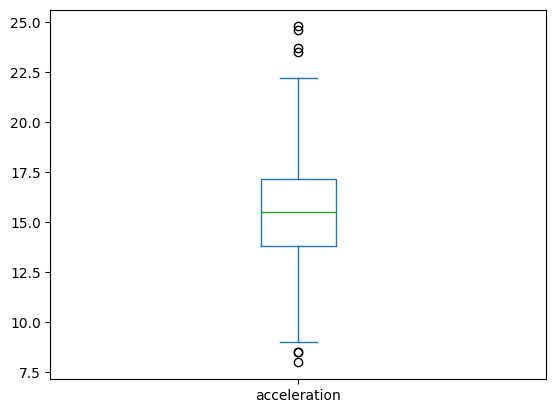

In [ ]:
# boxplot for 1 column:
(
    cars_df
    .loc[:,'acceleration']  # grab all the rows of data in the acceleration column
    .plot(kind='box')
)

mpg                Axes(0.125,0.11;0.0945122x0.77)
cylinders       Axes(0.238415,0.11;0.0945122x0.77)
displacement    Axes(0.351829,0.11;0.0945122x0.77)
horsepower      Axes(0.465244,0.11;0.0945122x0.77)
weight          Axes(0.578659,0.11;0.0945122x0.77)
acceleration    Axes(0.692073,0.11;0.0945122x0.77)
model_year      Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

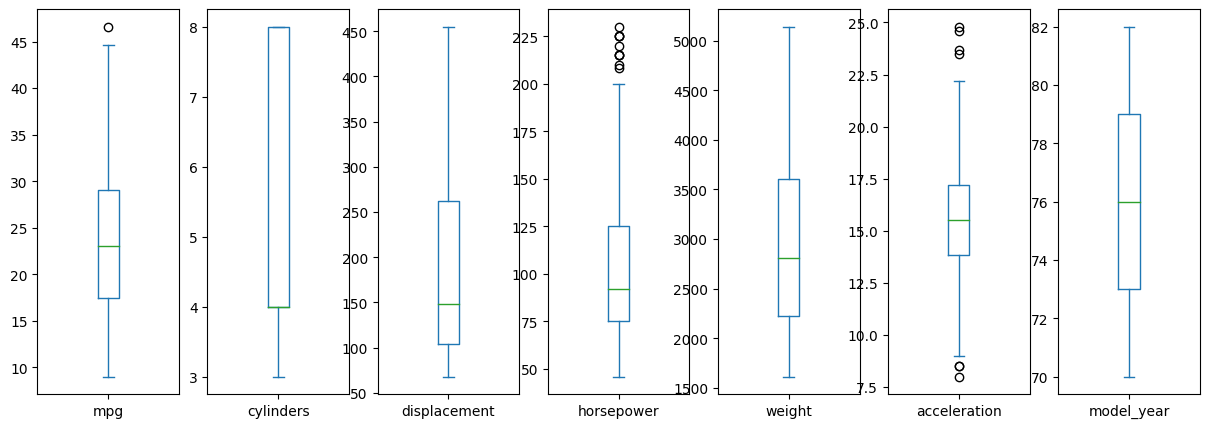

In [ ]:
#for all numeric columns:
(
    cars_df
    .select_dtypes('number')
    .plot(kind='box',subplots=True, figsize=(15,5))
)

In [ ]:
#define a function that uses np.clip to "clip" a series:
# we want to find the low and high values and replace the outliers with them
def my_clip(x):
    q1, q3 = x.quantile([.25,.75])
    iqr = q3 - q1
    low = q1 -(1.5*iqr)
    high = q3 + (1.5*iqr)

    return np.clip(x, low, high)

mpg                Axes(0.125,0.11;0.0945122x0.77)
cylinders       Axes(0.238415,0.11;0.0945122x0.77)
displacement    Axes(0.351829,0.11;0.0945122x0.77)
horsepower      Axes(0.465244,0.11;0.0945122x0.77)
weight          Axes(0.578659,0.11;0.0945122x0.77)
acceleration    Axes(0.692073,0.11;0.0945122x0.77)
model_year      Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

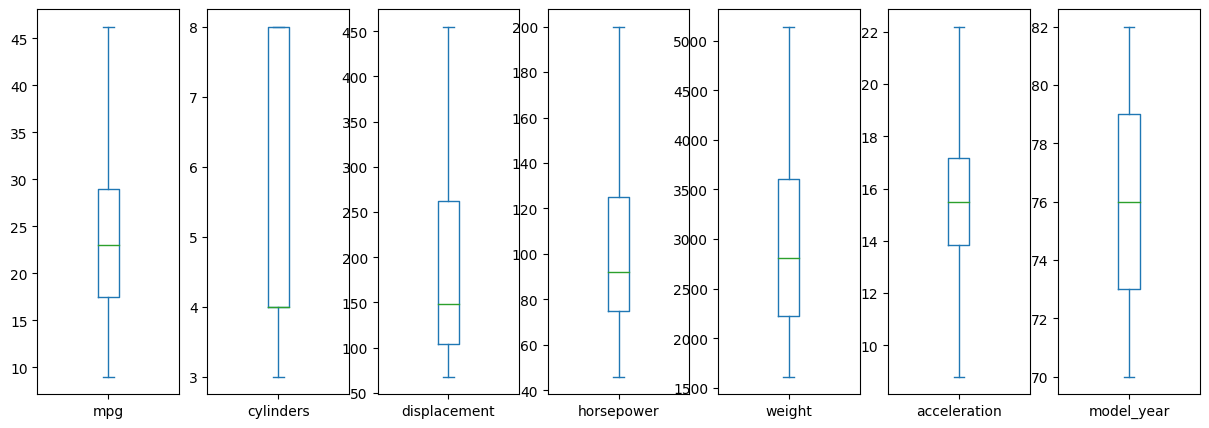

In [ ]:
#verify that clip is working, no more outliers and replaced by low and high
(
    cars_df
    .select_dtypes('number')
    .apply(
        my_clip
    )
    .plot(kind='box', subplots=True, figsize=(15,5))
)


In [ ]:
# and reassign to cars_df:

cars_df = (
    cars_df
    .assign(
        acceleration = lambda x:my_clip(x['acceleration']),
        horsepower = lambda x:my_clip(x['horsepower'])
    )
)

<hr style="border:2px solid gray">

#**STEP: 4/4** - Encode categorical columns and build a Random Forest Model


In [ ]:
# Split the data into Feature Matrix and Target Vector

target = 'mpg'
y = cars_df[target]
X = cars_df.drop(columns=[target])

In [ ]:
# Split data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# use dummy regressor instead of using mean
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)

y_pred_baseline = dummy_model.predict(X_train)

In [ ]:
#Determine the baseline MAE

print('BASELINE MAE', mean_absolute_error(y_train,y_pred_baseline))

BASELINE MAE 6.684739527708555


In [ ]:
# Random Forest Regressor

model = make_pipeline(
    make_column_transformer(
        (OrdinalEncoder(), ['origin']),
        (StandardScaler(), ['displacement','horsepower','weight','acceleration']),
        remainder='passthrough'
    ),
    SimpleImputer(), # nothing to impute but we still include this step here
    RandomForestRegressor(random_state=42,n_jobs=-1)
);

model.fit(X_train,y_train);

In [ ]:
l = ['a','b','c']
l[-1]

'c'

In [ ]:
model[-1].feature_importances_

array([0.00473879, 0.43915299, 0.16579615, 0.13547753, 0.02746864,
       0.1186594 , 0.10870649])

In [ ]:
model[:-1].get_feature_names_out()   # [:-1] means everything except the last element

array(['ordinalencoder__origin', 'standardscaler__displacement',
       'standardscaler__horsepower', 'standardscaler__weight',
       'standardscaler__acceleration', 'remainder__cylinders',
       'remainder__model_year'], dtype=object)

In [ ]:
importances_df = (
    pd.DataFrame({
        'importance':model[-1].feature_importances_
    },
        index=model[:-1].get_feature_names_out()
    )
    .sort_values('importance', ascending=False)
)

In [ ]:
importances_df

,importance
standardscaler__displacement,0.439153
standardscaler__horsepower,0.165796
standardscaler__weight,0.135478
remainder__cylinders,0.118659
remainder__model_year,0.108706
standardscaler__acceleration,0.027469
ordinalencoder__origin,0.004739


<Axes: >

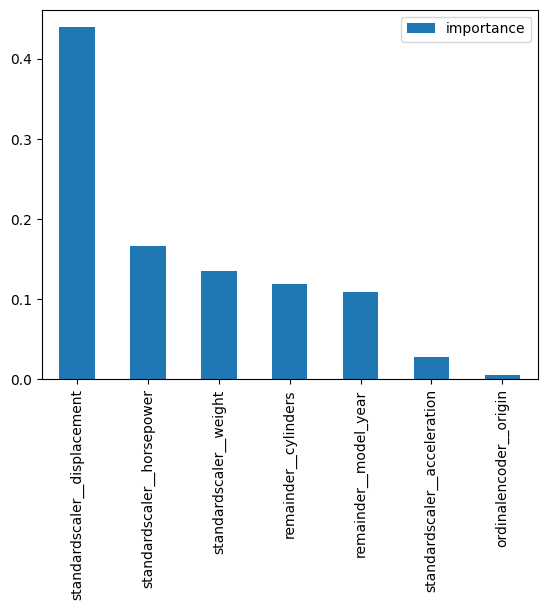

In [ ]:
importances_df.plot(kind='bar')

In [ ]:
# check your metrics
print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Test MAE: 1.6459874999999993


In [ ]:
# Plot the top ten feature importances

importances =
features =
feat_imp = pd.Series(importances, index=features).sort_values(key=abs)
feat_imp.tail(20).plot(kind='barh')
plt.xlabel('Reduction in Gini Impurity')
plt.ylabel('Features')
plt.title('Feature Importances');